# Prediction of volume S&P 500
- 2010/01/01 - 2014/07/31

In [0]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
os.chdir('gdrive/My Drive/home/qminers')

Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from qminers.utils import prepare_data_v1

prepare_data = prepare_data_v1

In [0]:
%load_ext autoreload

In [0]:
%autoreload

financial_df = pd.read_csv('data/sp500_2010_01_01-2014_07_31.csv')
calendar_df = pd.read_csv('data/econ_calendar.csv')

data_train_val, data_tes = prepare_data(financial_df, calendar_df)

In [0]:
data_train_val.head()

,Open,High,Low,Close,Adj Close,High Impact Expected,Low Impact Expected,Medium Impact Expected,Non-Economic,Volume
Date,,,,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,94.545494,6,33,15,0,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,94.795784,6,15,27,0,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,94.862526,21,21,12,3,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,95.262955,18,9,21,0,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,95.579971,10,20,10,0,126402800


# Load economic calendar

In [0]:
econ_cal = pd.read_csv('data/econ_calendar.csv')
econ_cal['timestamp'] = econ_cal['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
econ_cal = econ_cal.set_index('timestamp')

In [0]:
econ_cal.head()

,currency,impact,event,actual,forecast,previous
timestamp,,,,,,
2010-01-01,CHF,Non-Economic,Bank Holiday,NaN,NaN,NaN
2010-01-01,EUR,Non-Economic,French Bank Holiday,NaN,NaN,NaN
2010-01-01,EUR,Non-Economic,German Bank Holiday,NaN,NaN,NaN
2010-01-01,EUR,Non-Economic,Italian Bank Holiday,NaN,NaN,NaN
2010-01-01,GBP,Non-Economic,Bank Holiday,NaN,NaN,NaN


In [0]:
econ_cal.dropna().head()

,currency,impact,event,actual,forecast,previous
timestamp,,,,,,
2010-01-04 03:30:00,CHF,Medium Impact Expected,Manufacturing PMI,54.6,57.1,56.9
2010-01-04 03:45:00,EUR,Low Impact Expected,Italian Manufacturing PMI,50.8,50.5,50.1
2010-01-04 03:50:00,EUR,Low Impact Expected,French Final Manufacturing PMI,54.7,54.4,54.4
2010-01-04 03:55:00,EUR,Low Impact Expected,German Final Manufacturing PMI,52.7,53.1,53.1
2010-01-04 04:00:00,EUR,Low Impact Expected,Final Manufacturing PMI,51.6,51.6,51.6


In [0]:
econ_cal.describe()

,currency,impact,event,actual,forecast,previous
count,21377,21377,21377,17235,13848,17224
unique,10,4,458,4095,2928,4093
top,USD,Medium Impact Expected,Bank Holiday,0.1%,0.2%,0.1%
freq,5321,8780,424,466,665,476


### What kind of events are there?

In [0]:
econ_cal['event'].value_counts()

Bank Holiday                            424
Unemployment Rate                       420
Trade Balance                           403
Retail Sales m/m                        305
Crude Oil Inventories                   249
Unemployment Claims                     249
Natural Gas Storage                     249
CB Leading Index m/m                    222
Manufacturing PMI                       213
Current Account                         206
PPI m/m                                 173
CPI m/m                                 172
Industrial Production m/m               171
Retail Sales y/y                        165
10-y Bond Auction                       162
Final Manufacturing PMI                 142
Core Retail Sales m/m                   130
Monetary Policy Meeting Minutes         120
30-y Bond Auction                       118
Consumer Confidence                     117
CPI y/y                                 114
PPI y/y                                 114
Employment Change               

## First try only the impact

In [0]:
# Encode impact as categories

# econ_cal['impact'] = econ_cal['impact'].astype('category')
# econ_cal['impact_cat'] = econ_cal['impact'].cat.codes

econ_cal = pd.get_dummies(econ_cal['impact'])

# extract date so we can groupby
econ_cal['date'] = econ_cal.apply(lambda x: x.name.date(), axis=1)

econ_cal_impact = econ_cal.groupby('date').sum()

econ_cal_impact.head()

,High Impact Expected,Low Impact Expected,Medium Impact Expected,Non-Economic
date,,,,
2010-01-01,0,0,0,21
2010-01-02,0,3,0,0
2010-01-03,3,3,6,3
2010-01-04,6,33,15,0
2010-01-05,6,15,27,0


## Merge economic & financial data

In [0]:
df = df.merge(econ_cal_impact, left_index=True, right_index=True, how='left')
df.head()

,Open,High,Low,Close,Adj Close,Volume,High Impact Expected,Low Impact Expected,Medium Impact Expected,Non-Economic
Date,,,,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,94.545494,118944600,6,33,15,0
2010-01-05,113.260002,113.680000,112.849998,113.629997,94.795784,111579900,6,15,27,0
2010-01-06,113.519997,113.989998,113.430000,113.709999,94.862526,116074400,21,21,12,3
2010-01-07,113.500000,114.330002,113.180000,114.190002,95.262955,131091100,18,9,21,0
2010-01-08,113.889999,114.620003,113.660004,114.570000,95.579971,126402800,10,20,10,0


## Add seasonality data

In [0]:
# Day of month
df['day'] = df.apply(lambda x: x.name.day, axis=1)

### Day of week

In [0]:
df['dow'] = df.apply(lambda x: x.name.weekday(), axis=1)

### Season

In [0]:
df.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', length=1151)

In [0]:
# AChampion's anwer: https://stackoverflow.com/questions/44124436/python-datetime-to-season/44124490
df['season'] = (df.index.month % 12 + 3) // 3

In [0]:
df.tail()

,Open,High,Low,Close,Adj Close,High Impact Expected,Low Impact Expected,Medium Impact Expected,Non-Economic,Volume
Date,,,,,,,,,,
2014-07-25,198.089996,198.259995,197.330002,197.720001,180.718124,3,2,4,0,76837000
2014-07-28,197.759995,198.089996,196.619995,197.800003,180.791229,1,2,3,0,69259000
2014-07-29,198.169998,198.449997,196.919998,196.949997,180.014328,1,3,5,0,80466000
2014-07-30,197.649994,197.910004,196.160004,196.979996,180.041748,5,5,9,0,104222000
2014-07-31,195.610001,195.779999,192.970001,193.089996,176.486221,7,7,8,0,183479000


### Move volume to the end

In [0]:
temp_vol = df.pop('Volume')
df['Volume'] = temp_vol

In [0]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'High Impact Expected',
       'Low Impact Expected', 'Medium Impact Expected', 'Non-Economic',
       'Volume'],
      dtype='object')

### Split data

In [0]:
from sklearn.model_selection import train_test_split

data_train_val, data_test = train_test_split(data, test_size=TEST_RATIO, shuffle=False)

(1152, 10)

# Normalize data

- normalize to [0, 1]
- with clipping?

In [0]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

scaler = MinMaxScaler()
# scaler = RobustScaler()
# scaler = StandardScaler()
scaler.fit(data_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
def transform_data(data, scaler):
  res = scaler.transform(data)
  res = res.clip(0, 1)
  return res

data_train_transformed = transform_data(data_train, scaler)
data_val_transformed = transform_data(data_val, scaler)
data_test_transformed = transform_data(data_test, scaler)

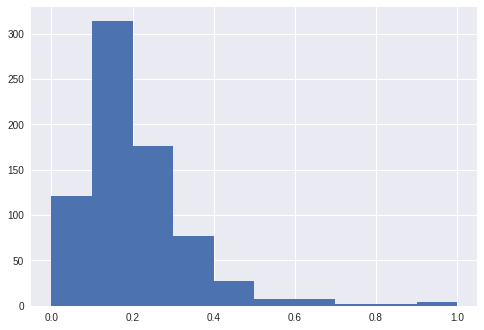

In [0]:
plt.figure()
plt.hist(data_train_transformed[:,-1]);

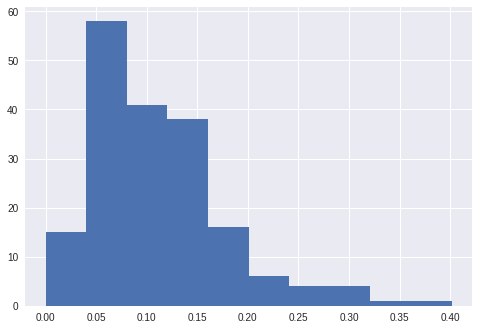

In [0]:
plt.figure()
plt.hist(data_val_transformed[:,-1]);

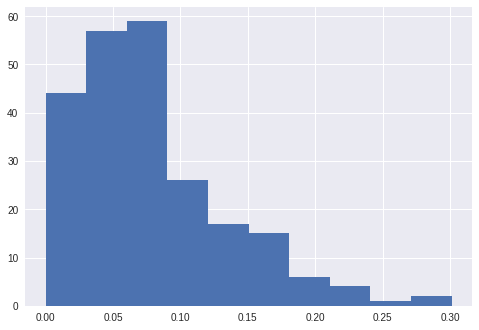

In [0]:
plt.figure()
plt.hist(data_test_transformed[:,-1]);

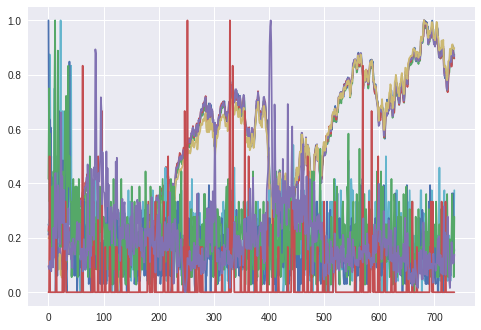

In [0]:
plt.figure()
plt.plot(data_train_transformed);

<Figure size 576x396 with 0 Axes>

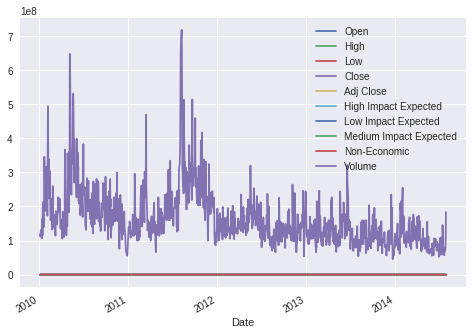

In [0]:
plt.figure()
df.plot()

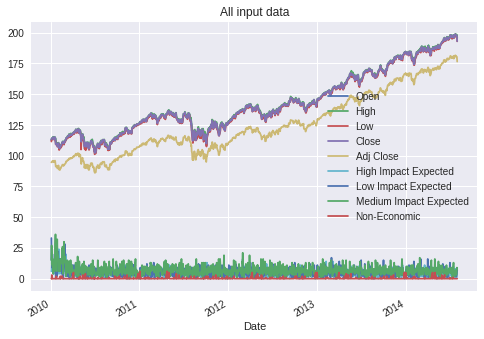

In [0]:
df.drop('Volume', axis=1).plot()
plt.title('All input data');

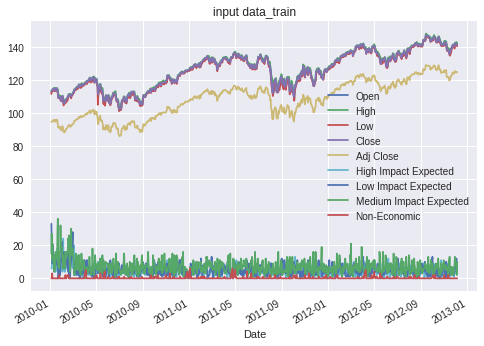

In [0]:
data_train.drop('Volume', axis=1).plot()
plt.title('input data_train');

# Baseline

In [0]:
i_volume = -1

In [0]:
y_true = data_train_transformed[1:, i_volume]
y_pred = data_train_transformed[:-1, i_volume]
r2_score(y_true, y_pred)

0.4604829976551562

In [0]:
y_true = data_val_transformed[1:, i_volume]
y_pred = data_val_transformed[:-1, i_volume]
r2_score(y_true, y_pred)

-0.11746752098938229

In [0]:
y_true = data_test_transformed[1:, i_volume]
y_pred = data_test_transformed[:-1, i_volume]
r2_score(y_true, y_pred)

-0.11200065846940155

## Add seasonality info

In [0]:
data_train

array([[0.22603181, 0.21444436, 0.23132089, 0.20875913, 0.20875913,
        0.10966443],
       [0.20309759, 0.22855338, 0.23521705, 0.24912559, 0.24912559,
        0.3092316 ],
       [0.23987483, 0.23480397, 0.26438255, 0.25709064, 0.25709064,
        0.15282488],
       ...,
       [0.88699525, 0.87396952, 0.89215437, 0.88810676, 0.88810676,
        0.30658379],
       [0.88788616, 0.88499859, 0.88509665, 0.87294375, 0.87294375,
        0.21362666],
       [0.87217013, 0.86101552, 0.87438791, 0.8675061 , 0.8675061 ,
        0.23170583]])